In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential

/var/folders/hg/69dt6nq563b9pt0myh8sprb40000gn/T/ipykernel_8825/2885888809.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-03-02 00:49:42.086100: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/SAGOR/Labs/AI_Lab/ai_venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' m

# For GPU users

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print(f'GPU: {physical_devices}')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

GPU: []


# Dataset from google drive

In [3]:
# from google.colab import drive

# drive.mount('/content/drive/')
# data_folder_path = '/content/drive/MyDrive/'

# Dataset create

In [4]:
import os
import cv2

train_cutter_dir = './data/train/cutter/'
train_rubber_dir = './data/train/rubber/'
test_cutter_dir = './data/test/cutter/'
test_rubber_dir = './data/test/rubber/'
val_cutter_dir = './data/val/cutter/'
val_rubber_dir = './data/val/rubber/'


def load_images(directory):
    images = []
    labels = []
    idx = 1
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.jpg', '.jpeg')):
            print(f"\rimage no: {idx}", end='')
            idx = idx + 1
            img = cv2.imread(os.path.join(directory, filename))
            img = cv2.resize(img, (32, 32))
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images.append(img)
            if 'cutter' in directory:
                labels.append(0)
            elif 'rubber' in directory:
                labels.append(1)
    return np.array(images), np.array(labels)


print("Loading train images...")
train_cutter_images, train_cutter_labels = load_images(train_cutter_dir)
print()
train_rubber_images, train_rubber_labels = load_images(train_rubber_dir)
print("\nLoading test images...")
test_cutter_images, test_cutter_labels = load_images(test_cutter_dir)
print()
test_rubber_images, test_rubber_labels = load_images(test_rubber_dir)
print("\nLoading validation images...")
val_cutter_images, val_cutter_labels = load_images(val_cutter_dir)
print()
val_rubber_images, val_rubber_labels = load_images(val_rubber_dir)

train_images = np.concatenate((train_cutter_images, train_rubber_images))
train_labels = np.concatenate((train_cutter_labels, train_rubber_labels))
test_images = np.concatenate((test_cutter_images, test_rubber_images))
test_labels = np.concatenate((test_cutter_labels, test_rubber_labels))
val_images = np.concatenate((val_cutter_images, val_rubber_images))
val_labels = np.concatenate((val_cutter_labels, val_rubber_labels))

train_images = train_images / 255.0
test_images = test_images / 255.0
val_images = val_images / 255.0

print(f'\nShape of train_cutter_images: {train_images.shape}')
print(f'Shape of test_cutter_images: {train_labels.shape}')
print(f'Shape of test_cutter_images: {test_images.shape}')
print(f'Shape of test_cutter_images: {test_labels.shape}')
print(f'Shape of val_rubber_images: {val_images.shape}')
print(f'Shape of val_rubber_images: {val_labels.shape}')

Loading train images...
image no: 40

Invalid SOS parameters for sequential JPEG


image no: 81

Invalid SOS parameters for sequential JPEG


image no: 381
image no: 270

Invalid SOS parameters for sequential JPEG


image no: 326
Loading test images...
image no: 45
image no: 42

Invalid SOS parameters for sequential JPEG


image no: 47
Loading validation images...
image no: 49
image no: 13

Invalid SOS parameters for sequential JPEG


image no: 44
Shape of train_cutter_images: (707, 32, 32, 3)
Shape of test_cutter_images: (707,)
Shape of test_cutter_images: (92, 32, 32, 3)
Shape of test_cutter_images: (92,)
Shape of val_rubber_images: (93, 32, 32, 3)
Shape of val_rubber_images: (93,)


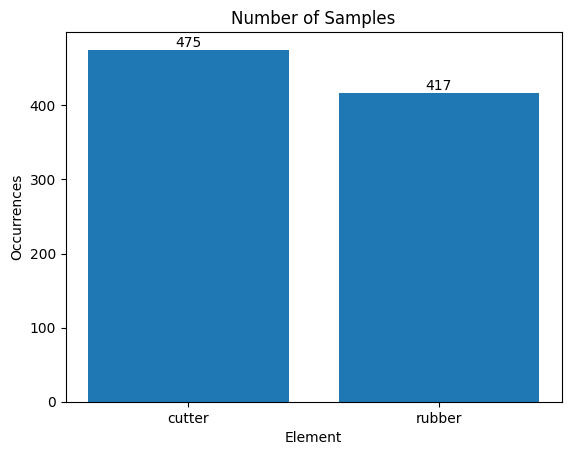

In [5]:

labels = np.concatenate((train_labels, test_labels, val_labels))

values, counts = np.unique(labels, return_counts=True)

plt.bar(values, counts)
plt.xlabel('Element')
plt.ylabel('Occurrences')
plt.title('Number of Samples')

for i, count in enumerate(counts):
    plt.text(values[i], count, str(count), ha='center', va='bottom')

plt.xticks(values, ['cutter', 'rubber'])

# plt.savefig('total_samples.png')

plt.show()


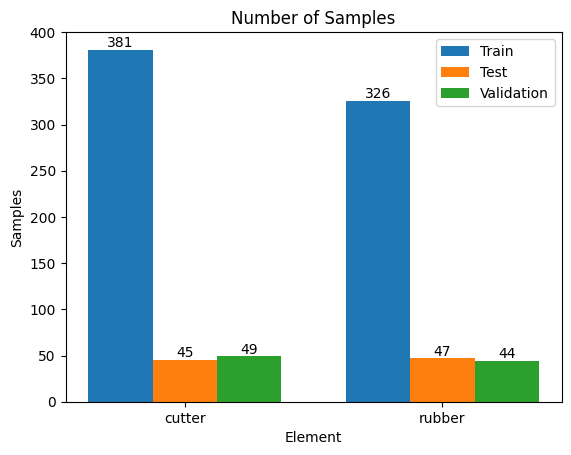

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already loaded train_labels, test_labels, and val_labels

# Calculate counts for each label in train, test, and val sets
train_values, train_counts = np.unique(train_labels, return_counts=True)
test_values, test_counts = np.unique(test_labels, return_counts=True)
val_values, val_counts = np.unique(val_labels, return_counts=True)

# Set the width of each individual bar
bar_width = 0.25

# Set the x positions for the train, test, and val bars
train_x = np.arange(len(train_values)) - bar_width
test_x = np.arange(len(test_values))
val_x = np.arange(len(val_values)) + bar_width

# plt.figure(figsize=(10, 6))

# Plot the train bars and their counts
plt.bar(train_x, train_counts, width=bar_width, label='Train')
for i, count in enumerate(train_counts):
    plt.text(train_x[i], count, str(count), ha='center', va='bottom')

# Plot the test bars and their counts
plt.bar(test_x, test_counts, width=bar_width, label='Test')
for i, count in enumerate(test_counts):
    plt.text(test_x[i], count, str(count), ha='center', va='bottom')

# Plot the val bars and their counts
plt.bar(val_x, val_counts, width=bar_width, label='Validation')
for i, count in enumerate(val_counts):
    plt.text(val_x[i], count, str(count), ha='center', va='bottom')



plt.xlabel('Element')
plt.ylabel('Samples')
plt.title('Number of Samples')

# Set x-axis ticks and labels
plt.xticks(test_x, ['cutter', 'rubber'])

# Add legend
plt.legend()

# Save the plot
# plt.savefig('spillited_samples.png')

# Show the plot
plt.show()


Label: cutter


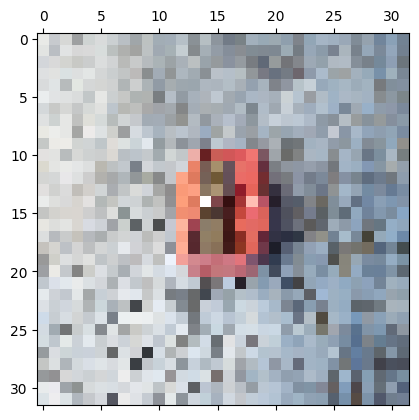

In [7]:
idx = 20
print("Label:", 'cutter' if labels[idx]==0 else 'rubber')
plt.matshow(train_images[idx])

# CNN Model

In [8]:
model = Sequential([
    Conv2D(filters=64, kernel_size = (3,3), activation = 'relu', padding='same'),
    Conv2D(filters=64, kernel_size = (3,3), activation = 'relu', padding='same'),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size = (3,3), activation = 'relu', padding='same'),
    Conv2D(filters=128, kernel_size = (3,3), activation = 'relu', padding='same'),
    Conv2D(filters=128, kernel_size = (3,3), activation = 'relu', padding='same'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

model.build(input_shape=(None, 32, 32, 3))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       147584    
                                                        

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=15)


Epoch 1/15
23/23 [==============================] - 18s 674ms/step - loss: 0.6899 - accuracy: 0.5545 - val_loss: 0.6354 - val_accuracy: 0.5269
Epoch 2/15
23/23 [==============================] - 12s 500ms/step - loss: 0.6056 - accuracy: 0.6506 - val_loss: 0.6805 - val_accuracy: 0.4409
Epoch 3/15
23/23 [==============================] - 12s 523ms/step - loss: 0.5707 - accuracy: 0.6761 - val_loss: 0.6396 - val_accuracy: 0.6559
Epoch 4/15
23/23 [==============================] - 13s 573ms/step - loss: 0.4619 - accuracy: 0.7539 - val_loss: 0.4808 - val_accuracy: 0.7957
Epoch 5/15
23/23 [==============================] - 13s 557ms/step - loss: 0.4304 - accuracy: 0.8274 - val_loss: 0.5817 - val_accuracy: 0.7527
Epoch 6/15
23/23 [==============================] - 12s 515ms/step - loss: 0.2844 - accuracy: 0.8713 - val_loss: 0.8212 - val_accuracy: 0.7634
Epoch 7/15
23/23 [==============================] - 12s 509ms/step - loss: 0.2167 - accuracy: 0.9123 - val_loss: 0.8646 - val_accuracy: 0.8280

# Model history view

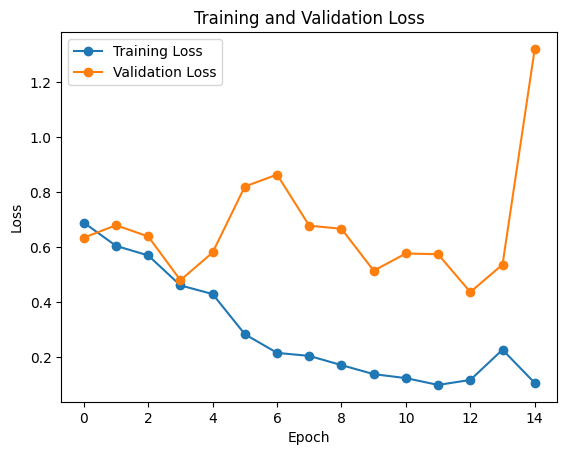

In [10]:
plt.plot(history.history['loss'],  '-o',  label='Training Loss')
plt.plot(history.history['val_loss'], '-o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# plt.savefig('CNN_Training_and_Validation_Loss.png')
plt.show()

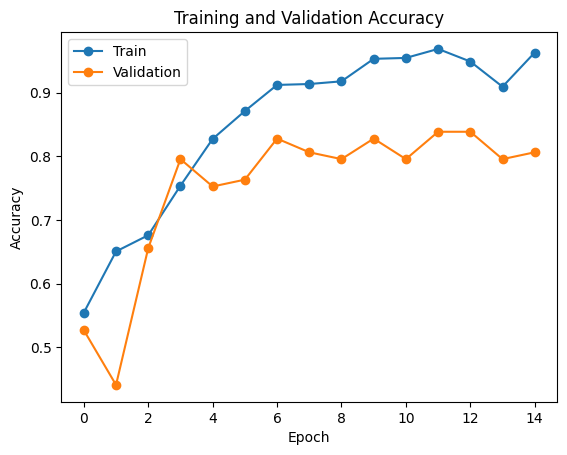

In [11]:
plt.plot(history.history['accuracy'], '-o')
plt.plot(history.history['val_accuracy'], '-o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig('CNN_Training_and_Validation_Accuracy.png')
plt.show()

# Testing

In [12]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.3f}%")

3/3 [==============================] - 0s 154ms/step - loss: 0.3379 - accuracy: 0.8696
Test Loss: 0.3378883
Test Accuracy: 86.957%


In [13]:
y_pred = model.predict(test_images)
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred[0]

3/3 [==============================] - 1s 110ms/step


array([0.94301754, 0.05698243], dtype=float32)

Actual: rubber


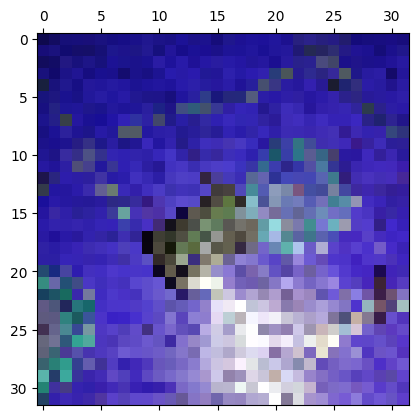

In [14]:
idx = 30
print(f'Actual: {"cutter" if np.argmax(y_pred[idx]) == 0 else "rubber"}')
plt.matshow(test_images[idx])

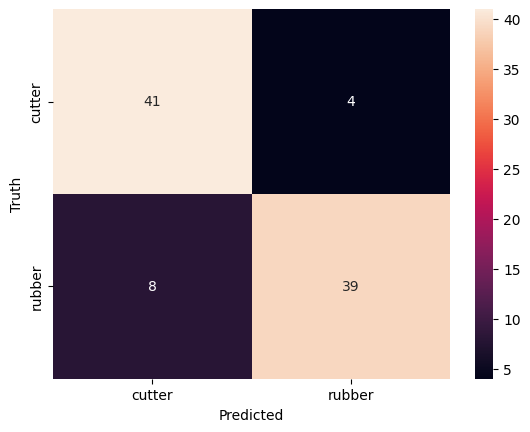

In [15]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred_labels)

heatmap = sn.heatmap(cm, annot=True, fmt='d')

heatmap.set_xlabel('Predicted')
heatmap.set_ylabel('Truth')
heatmap.set_xticklabels(['cutter', 'rubber'], ha='center')
heatmap.set_yticklabels(['cutter', 'rubber'], va='center')

plt.show()